In [1]:
# Thư viện cần thiết cho phân tích và trực quan hóa dữ liệu
# numpy: xử lý mảng số học
# pandas: đọc và thao tác dữ liệu dạng bảng
# seaborn & matplotlib: trực quan hóa dữ liệu
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Cấu hình hiển thị đồ thị đẹp hơn
sns.set(style="whitegrid", palette="viridis")

In [2]:
# Đọc dữ liệu:
# File 'diabetes.csv' chứa bộ dữ liệu Pima Indians Diabetes
# Mỗi dòng là một bệnh nhân với các đặc trưng lâm sàng và cột Outcome (0: không mắc, 1: mắc tiểu đường)
df = pd.read_csv("diabetes.csv")

# Xem kích thước dữ liệu (số dòng, số cột)
print("Kích thước dữ liệu:", df.shape)

Kích thước dữ liệu: (768, 9)


## Thông tin & Cấu trúc Dữ liệu
Dưới đây là một số bước kiểm tra nhanh để hiểu dataset:
- Xem vài dòng đầu (định dạng & giá trị mẫu)
- Xem vài dòng cuối
- Thống kê mô tả (trung bình, độ lệch chuẩn, min/max, các percentiles)
- Thông tin kiểu dữ liệu và số lượng giá trị không null
- Kiểm tra giá trị khuyết (NaN)

In [3]:
# Xem 5 dòng đầu tiên để có cái nhìn tổng quan về cấu trúc và giá trị
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Xem 5 dòng cuối cùng để phát hiện bất thường ở cuối file
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# Thống kê mô tả các biến số: trung bình, độ lệch chuẩn, min, max, các phân vị
# Dùng để xem phân phối sơ bộ và phát hiện giá trị bất thường
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Thông tin kiểu dữ liệu từng cột và số lượng giá trị không bị thiếu
# Giúp kiểm tra xem có cột nào dạng object cần chuyển đổi không
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Đếm số lượng giá trị bị thiếu (NaN) ở mỗi cột
# Một số cột có thể không có NaN nhưng có giá trị 0 không hợp lệ (sẽ xử lý sau)
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Làm sạch dữ liệu
Các bước:
1. Kiểm tra dòng trùng lặp
2. Xác định các giá trị 0 không hợp lệ ở các cột sinh học (ví dụ Glucose không thể bằng 0)
3. Thay thế giá trị 0 không hợp lệ bằng trung vị (median) của cột
4. Kiểm tra lại sau khi thay thế

In [8]:
# Kiểm tra số lượng dòng trùng lặp hoàn toàn
# Nếu >0 có thể cần loại bỏ
df.duplicated().sum()

np.int64(0)

In [9]:
# Kiểm tra lại giá trị thiếu (để xác nhận không có NaN)
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# Xem các dòng có Huyết áp (BloodPressure) = 0 (không thực tế về mặt lâm sàng)
df[df["BloodPressure"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [11]:
# Các cột có khả năng chứa giá trị 0 KHÔNG HỢP LỆ (vì về sinh học hiếm khi là 0)
cols_with_invaildZero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Tính tỷ lệ % giá trị 0 trên tổng số dòng cho từng cột
for col in cols_with_invaildZero:
    invalid_count = ((df[col] == 0).sum() / len(df)) * 100
    print(f"{col} : {invalid_count:.2f}% giá trị 0")

Glucose : 0.65% giá trị 0
BloodPressure : 4.56% giá trị 0
SkinThickness : 29.56% giá trị 0
Insulin : 48.70% giá trị 0
BMI : 1.43% giá trị 0


In [12]:
# Thay thế giá trị 0 không hợp lệ bằng trung vị (median) của từng cột
for col in cols_with_invaildZero:
    median_value = df[col].median()
    df[col] = df[col].replace(0, median_value)

print("Đã thay thế xong các giá trị 0 không hợp lệ.")

Đã thay thế xong các giá trị 0 không hợp lệ.


In [13]:
# Kiểm tra lại xem còn giá trị 0 không hợp lệ không
for col in cols_with_invaildZero:
    invalid_count = ((df[col] == 0).sum()/len(df)) *100
    print(f"{col} : {invalid_count:.2f}% giá trị 0 (sau xử lý)")

Glucose : 0.00% giá trị 0 (sau xử lý)
BloodPressure : 0.00% giá trị 0 (sau xử lý)
SkinThickness : 0.00% giá trị 0 (sau xử lý)
Insulin : 0.00% giá trị 0 (sau xử lý)
BMI : 0.00% giá trị 0 (sau xử lý)


# Trực quan hóa dữ liệu
Mục tiêu:
- Kiểm tra phân phối từng biến
- Phát hiện ngoại lệ (outlier)
- So sánh sự khác biệt giữa nhóm Outcome 0 và 1
- Tìm mối quan hệ giữa các biến

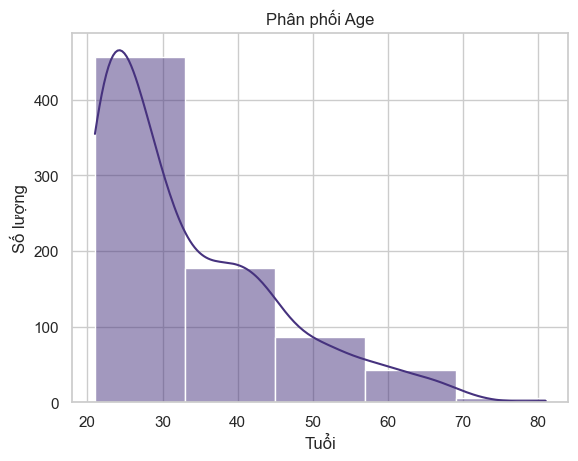

In [14]:
# Phân phối tuổi (Age)
sns.histplot(df["Age"], bins=5, kde=True)
plt.title("Phân phối Age")
plt.xlabel("Tuổi")
plt.ylabel("Số lượng")
plt.show()

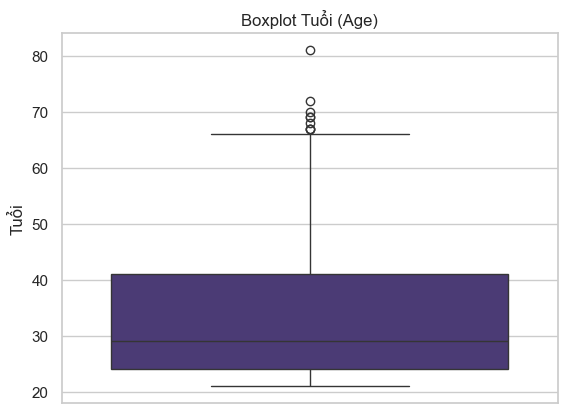

In [15]:
# Boxplot Age để phát hiện ngoại lệ
où = sns.boxplot(y="Age", data=df)
plt.title("Boxplot Tuổi (Age)")
plt.ylabel("Tuổi")
plt.show()

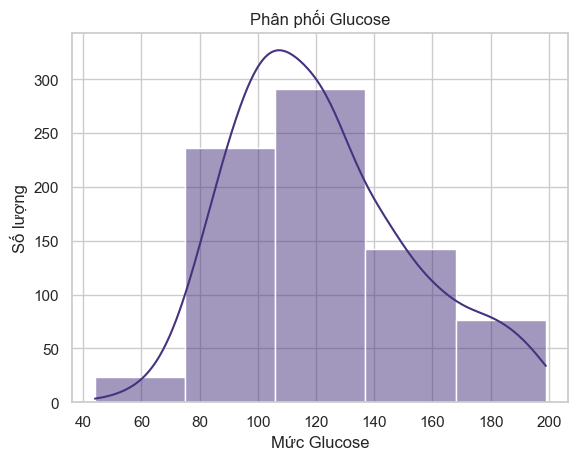

In [16]:
# Phân phối Glucose
sns.histplot(df["Glucose"], bins=5, kde=True)
plt.title("Phân phối Glucose")
plt.xlabel("Mức Glucose")
plt.ylabel("Số lượng")
plt.show()

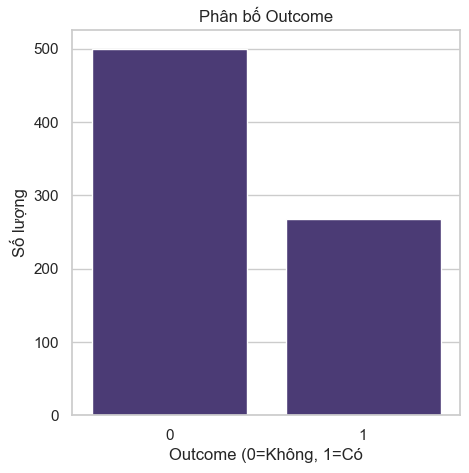

In [17]:
# Phân bố số ca theo Outcome (0 = Không mắc, 1 = Mắc)
plt.figure(figsize=(5,5))
sns.countplot(x='Outcome', data=df)
plt.title("Phân bố Outcome")
plt.xlabel("Outcome (0=Không, 1=Có")
plt.ylabel("Số lượng")
plt.show()

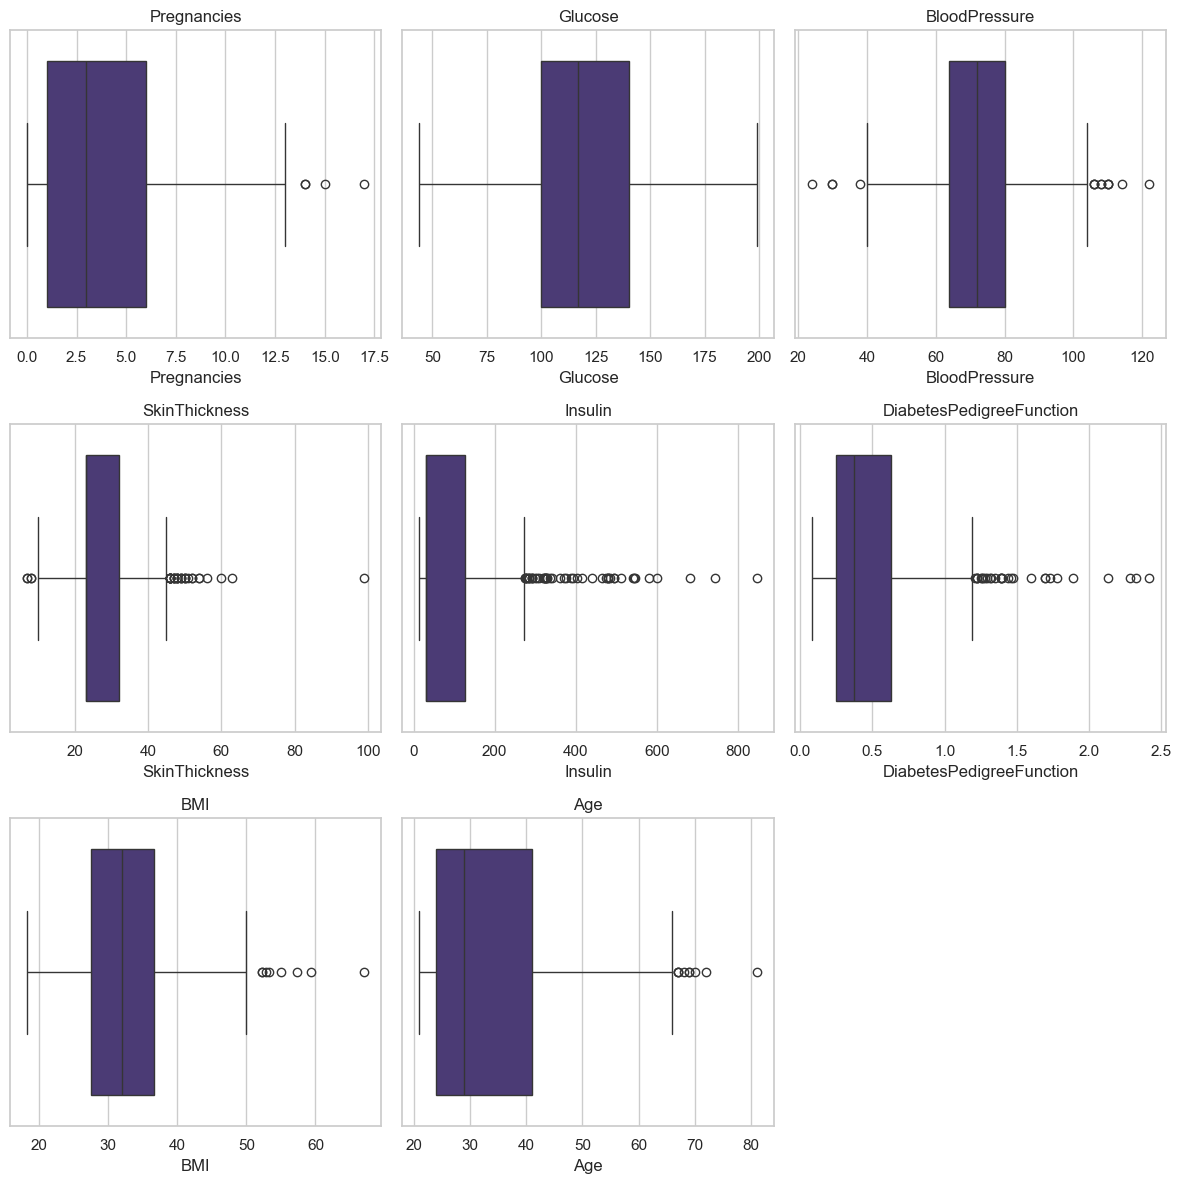

In [18]:
# Boxplot các biến để so sánh thang đo và phát hiện ngoại lệ
plt.figure(figsize=(12, 12))

for i, col in enumerate(['Pregnancies','Glucose','BloodPressure','SkinThickness',
                         'Insulin','DiabetesPedigreeFunction','BMI','Age']):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

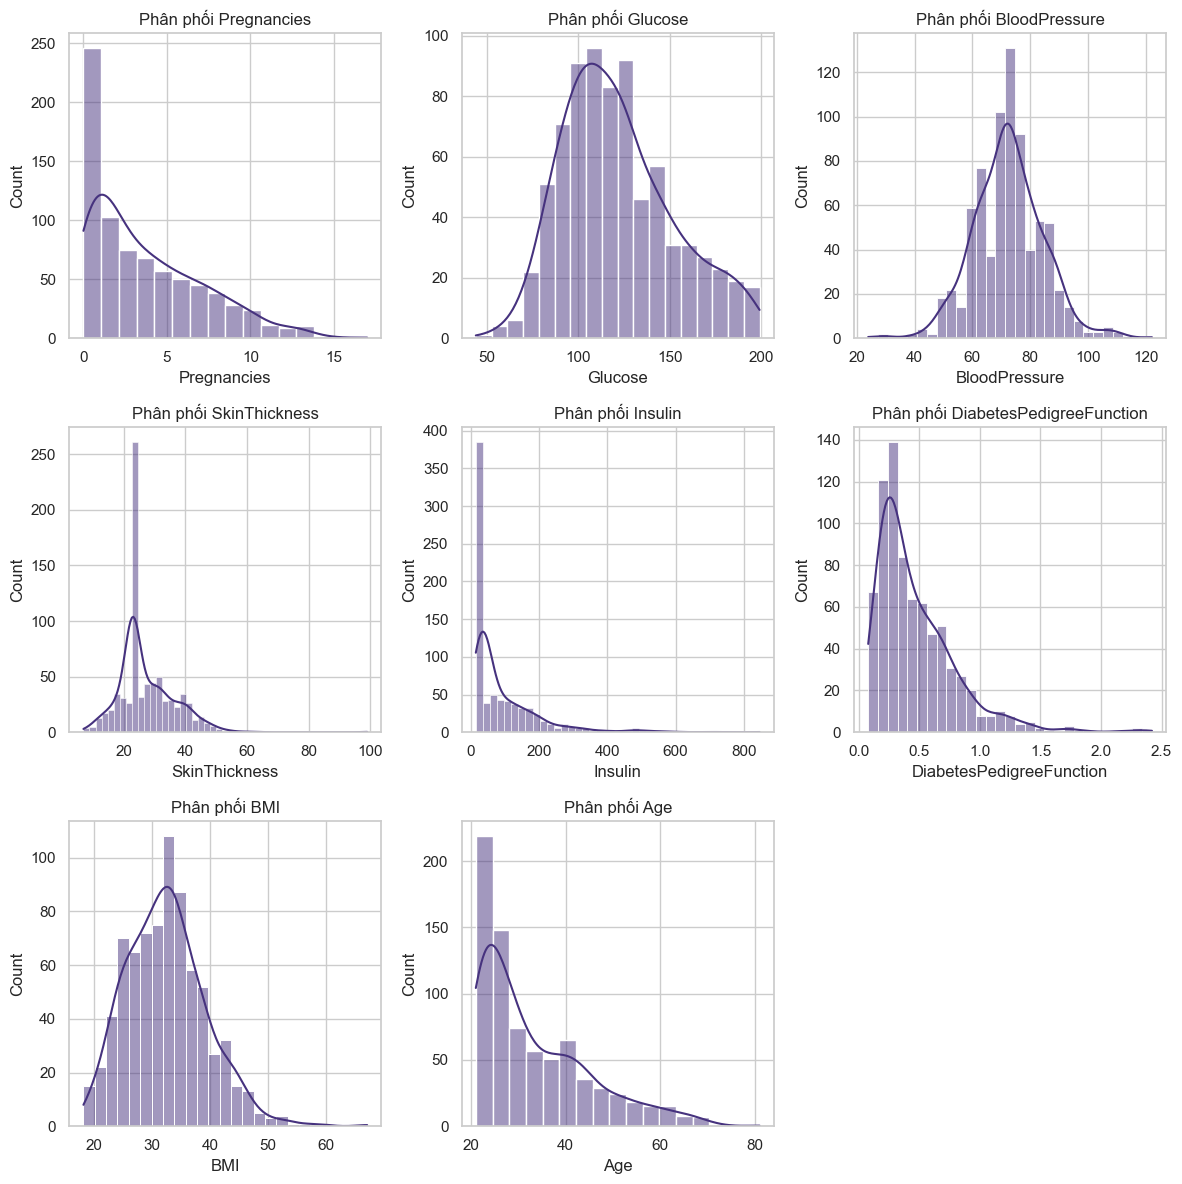

In [19]:
# Phân phối (histogram + KDE) của các biến
plt.figure(figsize=(12,12))

for i, col in enumerate(['Pregnancies','Glucose','BloodPressure','SkinThickness',
                         'Insulin','DiabetesPedigreeFunction','BMI','Age']):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Phân phối {col}")

plt.tight_layout()
plt.show()

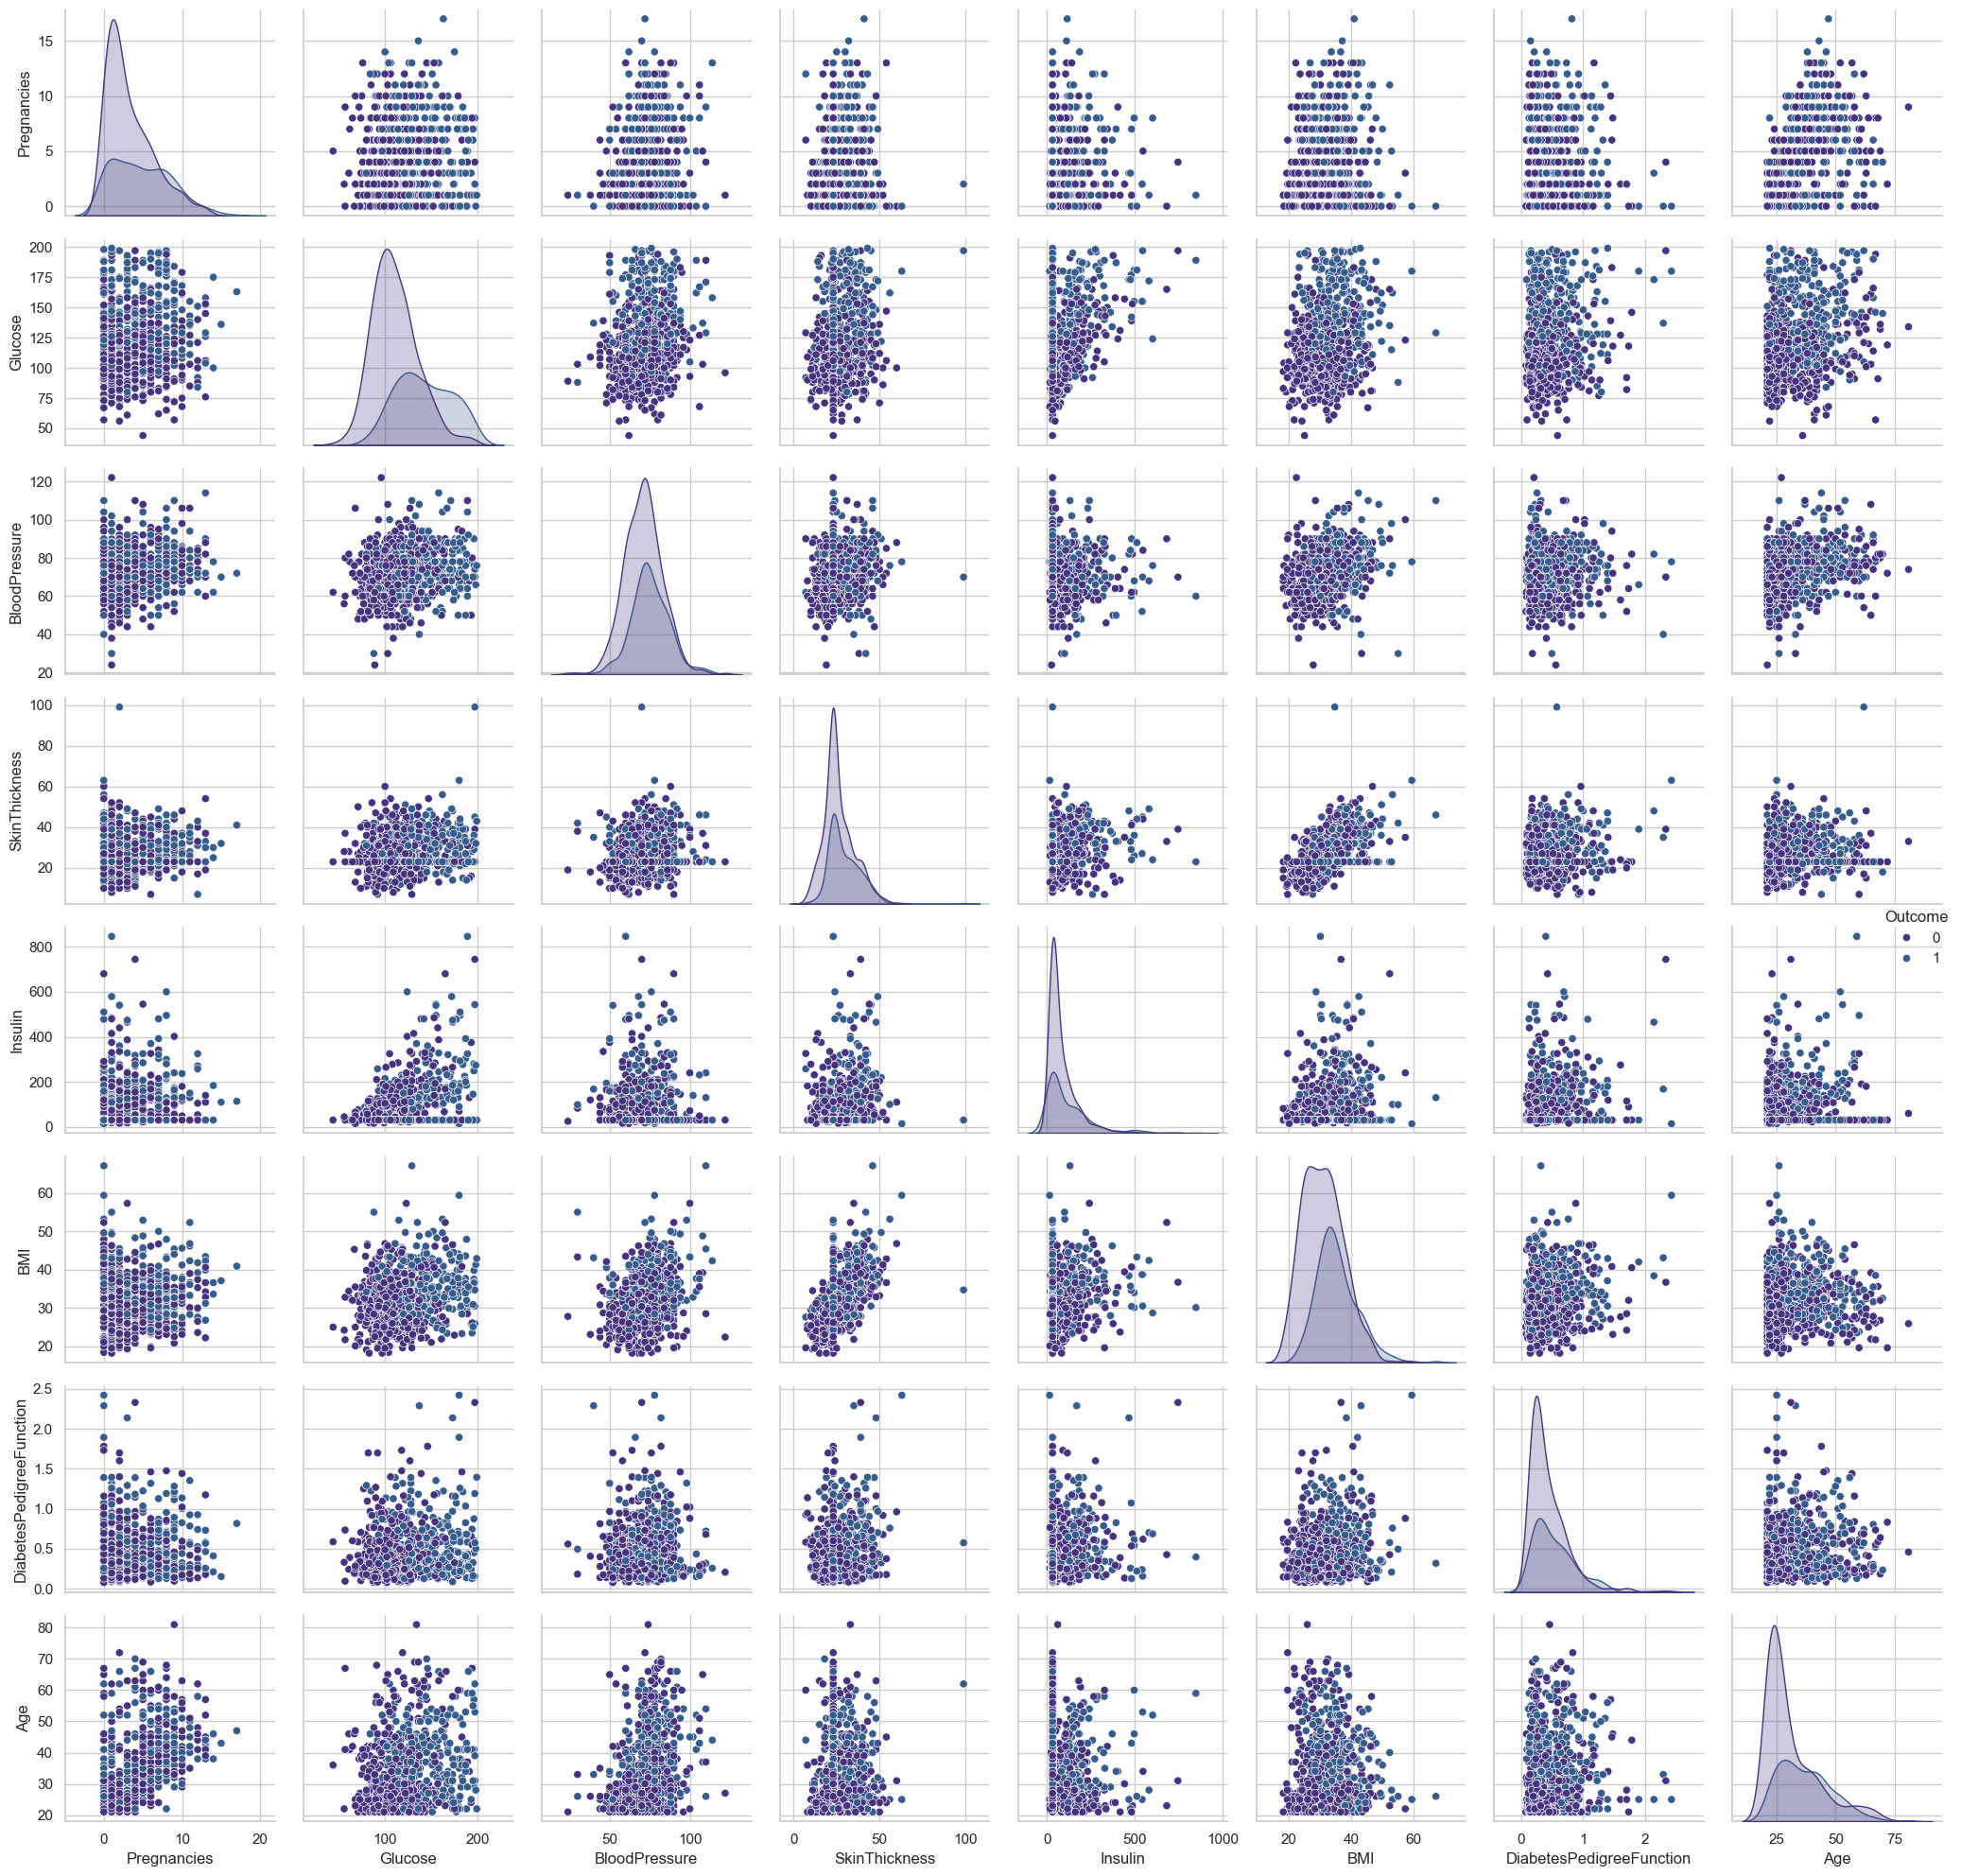

In [20]:
# Pairplot: xem quan hệ đôi giữa các biến có phân tách theo Outcome
sns.pairplot(df, hue='Outcome')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'BMI')

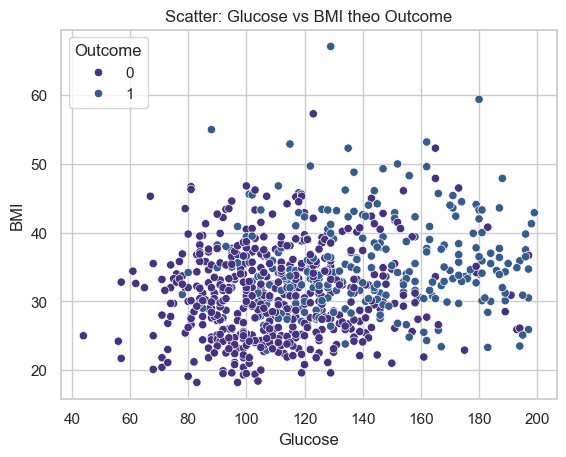

In [21]:
# Mối quan hệ giữa Glucose và BMI theo Outcome
sns.scatterplot(x="Glucose", y="BMI", hue="Outcome", data=df)
plt.title("Scatter: Glucose vs BMI theo Outcome")
plt.xlabel("Glucose")
plt.ylabel("BMI")

Text(0, 0.5, 'Tỷ lệ mắc (trung bình)')

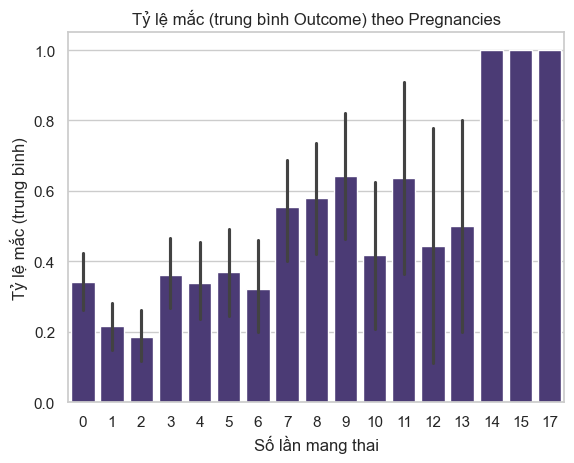

In [22]:
# Trung bình Outcome theo số lần mang thai (Pregnancies)
sns.barplot(x="Pregnancies", y="Outcome", data=df, estimator=np.mean)
plt.title("Tỷ lệ mắc (trung bình Outcome) theo Pregnancies")
plt.xlabel("Số lần mang thai")
plt.ylabel("Tỷ lệ mắc (trung bình)")

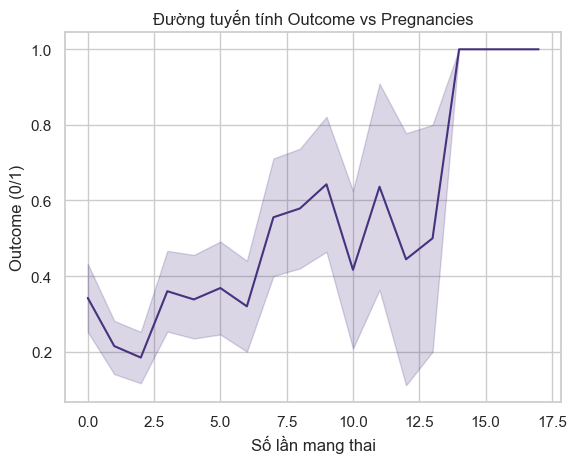

In [23]:
# Đường biểu diễn Outcome theo Pregnancies (có thể nhiễu vì Outcome là nhị phân)
sns.lineplot(x="Pregnancies", y="Outcome", data=df)
plt.title("Đường tuyến tính Outcome vs Pregnancies")
plt.xlabel("Số lần mang thai")
plt.ylabel("Outcome (0/1)")
plt.show()

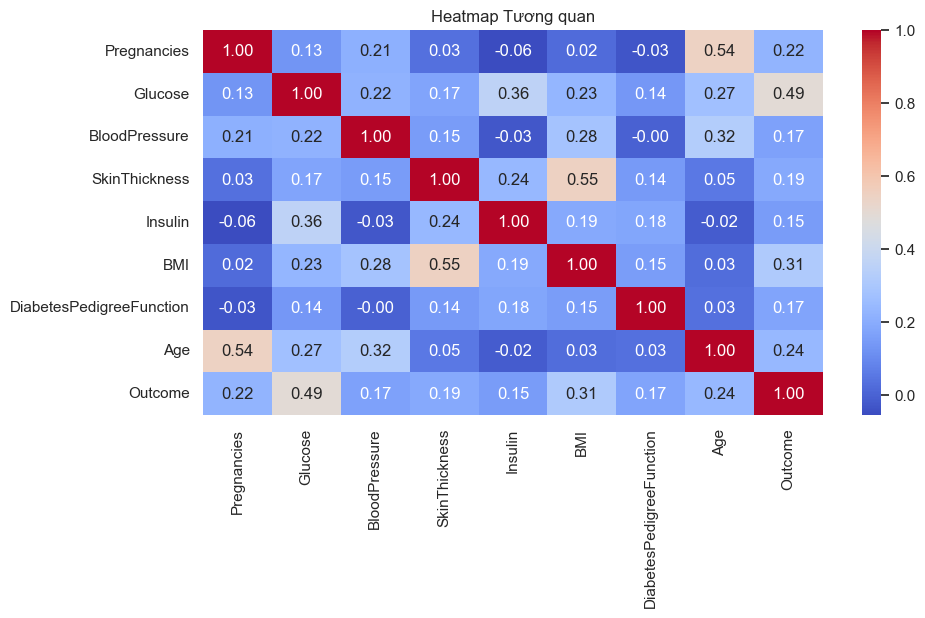

In [24]:
# Ma trận tương quan giữa các biến
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Tương quan")
plt.show()

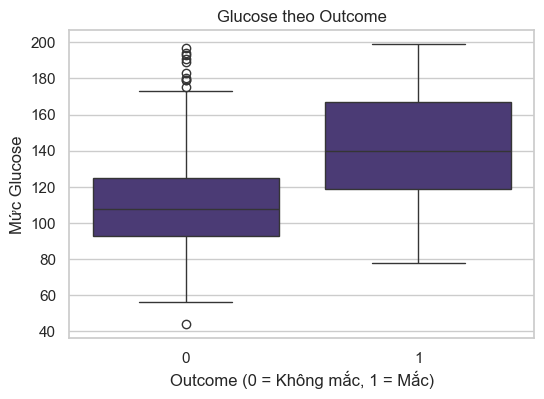

In [25]:
# So sánh phân phối Glucose theo Outcome
plt.figure(figsize=(6,4))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Glucose theo Outcome")
plt.xlabel("Outcome (0 = Không mắc, 1 = Mắc)")
plt.ylabel("Mức Glucose")
plt.show()

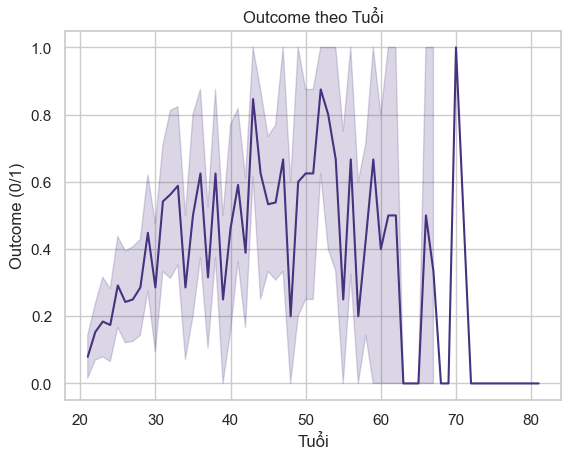

In [26]:
# Xu hướng Outcome theo Age (cẩn trọng khi diễn giải vì Outcome nhị phân)
sns.lineplot(x="Age", y="Outcome", data=df)
plt.title("Outcome theo Tuổi")
plt.xlabel("Tuổi")
plt.ylabel("Outcome (0/1)")
plt.show()